<a href="https://colab.research.google.com/github/himalayahall/cuny-bridge-math/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
def evenodd(num : int) -> None :
  '''
    Chapter 1.  Programming Challenge 1 page 22, Even-Odd Vending Machine
    Prints whether number is even-odd, then prints next 9 number of the same type.
    For example, if input is 1, the output will be:
      1 is odd
      1, 3, 5, 7, 9, 11, 13, 15, 17, 19
    if input is 2, the output will be:
      2 is even
      2, 4, 6, 8, 10, 12, 14, 16, 18, 20   
    Params:
      num : whole number
    Exceptions:
      Raises exception if input is non-numeric or is not a whole number (has significant digits to right of decimal)
  '''
  if (isinstance(num, int) == False):
    if (isinstance(num, float) == False or num.is_integer() == False):
      raise Exception("Invalid argument (must be integer): {}".format(num))

  if (num % 2 == 0):
    print ("{0} is even".format(num))
  else:
    print ("{0} is odd".format(num))

  for i in range(0, 10):
    print(num + i * 2)
  

In [18]:
# Test evenodd
evenodd(2)
evenodd(1)

2 is even
2
4
6
8
10
12
14
16
18
20
1 is odd
1
3
5
7
9
11
13
15
17
19


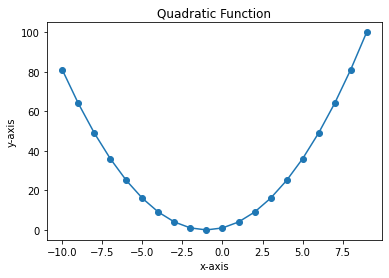

In [19]:
'''
Exploring a Quadratic Function Visually
'''

import matplotlib.pyplot as plt
from typing import List, Set, Dict, Tuple, Optional

def draw_plot(x :  List[float], y : List[float]) -> None:
  '''
  Draws plot.
  Params:
    x : x values
    y : y values
  '''    
  plt.plot(x, y, marker='o')
  plt.xlabel('x-axis')

  plt.ylabel('y-axis')
  plt.title('Quadratic Function')

def quad(x : float, a : float, b : float, c : float) -> float:
  '''
  Chapter 2.  Programming Challenge 2 page 55, Exploring a Quadratic Function Visually
  Quadratic function: a(x*x)+(b*x)+c
  Params:
    x : x value
    a : a value, cannot be 0.
    b : b value
    c : constant value
  Returns: a*sqr(x)+b*x+c
  '''
  if (a == 0):
    raise Exception("Invalid argument (a cannot be 0)")
  return (a * pow(x, 2)) + (b * x) + c

# Test quadratic function
x = [item for item in range(-10, 10)]
y = [quad(item, 1, 2, 1) for item in x]
draw_plot(x, y)
#print(x)
#print(y)

In [20]:
'''
Statistics Calculator
'''
import csv
from collections import Counter
def read_csv(filename : str) -> List[float]:
  with open(filename) as f:
    reader = csv.reader(f)

    'Skip header row'
    next(reader)
    data = []
    for row in reader:
      data.append(float(row[0]))
  return data

def calc_mean(numbers: List[float]) -> float:
  return sum(numbers) / len(numbers)

def calc_median(numbers: List[float]) -> float:
  numbers.sort()

  mids = []
  N = len(numbers)
  if (N % 2 == 1):
      mid_index = int((N + 1) / 2) - 1
      mids.append(numbers[mid_index])
  else:
      mid_index = int(N / 2) - 1
      mids.append(numbers[mid_index])
      mids.append(numbers[mid_index + 1] )
  
  return sum(mids) / len(mids)

def calc_mode(numbers: List[float]) -> float:
  counter = Counter(numbers)
  mode = counter.most_common(1)
  return mode[0][0]

def find_range(numbers: List[float]) -> List[float]:
  low = min(numbers)
  high = max(numbers)
  return low, high, high - low

def find_differences_from_mean(numbers: List[float]) -> List[float]:
  mean = calc_mean(numbers)
  diffs = [item - mean for item in numbers]
  return diffs

def calc_variance(numbers: List[float]) -> float:
  diffs = find_differences_from_mean(numbers)
  squared = [item ** 2 for item in diffs]
  return sum(squared) / len(numbers)

def stats_calculator() -> None:
  filename = input("Please enter CSV file name: ")
  numbers = read_csv(filename)
  
  mean = sum(numbers) / len(numbers)
  mode = calc_median(numbers)
  range = find_range(numbers)
  var = calc_variance(numbers)
  std = var ** 0.5


even_count_numbers = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
print("Mean: {0}, Median: {1}, Mode: {2}, Range: {3}".format(calc_mean(even_count_numbers), calc_median(even_count_numbers), calc_mode(even_count_numbers), find_range(even_count_numbers)))

odd_count_numbers = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200, 800]
print("Mean: {0}, Median: {1}, Mode: {2}".format(calc_mean(odd_count_numbers), calc_median(odd_count_numbers),calc_mode(odd_count_numbers)))

mode_numbers = [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
print("Mean: {0}, Median: {1}, Mode: {2}, Variance: {3}".format(calc_mean(mode_numbers), calc_median(mode_numbers),calc_mode(mode_numbers), calc_variance(mode_numbers)))



Mean: 477.75, Median: 500.0, Mode: 100, Range: (60, 1200, 1140)
Mean: 502.53846153846155, Median: 500.0, Mode: 100
Mean: 477.75, Median: 500.0, Mode: 100, Variance: 141047.35416666666


In [35]:
from sympy import Symbol
from sympy import factor
x = Symbol('x')
y = Symbol('y')

p = x**3 + 3*x**2*y + 3*x*y**2 + y**3
facts = factor(p)
print(facts)
facts.expand()

(x + y)**3


x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [36]:
from sympy import Symbol, pprint, init_printing
def print_series(n: int, x_value: float) -> None:
  init_printing(order='rev-lex')
  x = Symbol('x')
  series = x
  for i in range(2, n + 1):
    series = series + (x**i) / i
  pprint(series)
  series_value = series.subs({x:x_value})
  print('Value of the series at {0}: {1}'.format(x_value, series_value))

print_series(10, 2)

     2    3    4    5    6    7    8    9    10
    x    x    x    x    x    x    x    x    x  
x + ── + ── + ── + ── + ── + ── + ── + ── + ───
    2    3    4    5    6    7    8    9     10
Value of the series at 2: 74752/315


In [23]:
'''
from sympy import solve
x = Symbol('x')
expr = x - 5 - 7
solve(expr)

expr = x**2 + 5*x + 4
solve(expr, dict=True)
'''

"\nfrom sympy import solve\nx = Symbol('x')\nexpr = x - 5 - 7\nsolve(expr)\n\nexpr = x**2 + 5*x + 4\nsolve(expr, dict=True)\n"

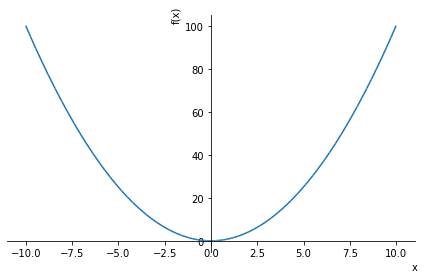

In [37]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(x**2)

In [25]:
from sympy import Poly, Symbol, solve_poly_inequality, sympify

def solve_single_var_inequality(var_symbol: str, ineq : str):
  '''
  Solving Single-Variable Inequalities.
  Params:
    var_symbol: variable symbol in inequality
    ineq: inequality expression
  '''
  
  ineq_expr = sympify(ineq)

  lhs = ineq_expr.lhs
  if (lhs.is_polynomial() == False):
    raise Exception('lhs is not a polynomial: {0}'.format(lhs))

  symbol = Symbol(var_symbol)
  poly = Poly(lhs, symbol)
  rel = ineq_expr.rel_op
  return solve_poly_inequality(poly, rel)

solve_single_var_inequality('x', '-x**2 + 4 < 0')
#

[Interval.open(-oo, -2), Interval.open(2, oo)]